In [2]:
import pandas as pd
import seaborn as sns

# Load the excel file into a DataFrame
df = pd.read_excel('vaccine_city_sex.xlsx', engine='openpyxl')

# Display the first few rows of the DataFrame
df.head()

,date,county,city,gender,population,atleast_onedose,fully_vaccinated,boosted_after_2022-09-01,boosted,boosted_second,partially_vaccinated
0,2021-03-09,Barnstable,Barnstable,Female,23171.0,7280.0,3798.0,NaN,NaN,NaN,3482.0
1,2021-03-09,Barnstable,Barnstable,Male,21601.0,4895.0,2239.0,NaN,NaN,NaN,2656.0
2,2021-03-09,Barnstable,Barnstable,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-09,Barnstable,Barnstable,Total,44773.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-09,Barnstable,Bourne,Female,9945.0,3394.0,1631.0,NaN,NaN,NaN,1763.0


In [3]:
#preprocess
df_cleaned = df.dropna(subset=['gender', 'fully_vaccinated'])
df_cleaned.head()

,date,county,city,gender,population,atleast_onedose,fully_vaccinated,boosted_after_2022-09-01,boosted,boosted_second,partially_vaccinated
0,2021-03-09,Barnstable,Barnstable,Female,23171.0,7280.0,3798.0,NaN,NaN,NaN,3482.0
1,2021-03-09,Barnstable,Barnstable,Male,21601.0,4895.0,2239.0,NaN,NaN,NaN,2656.0
4,2021-03-09,Barnstable,Bourne,Female,9945.0,3394.0,1631.0,NaN,NaN,NaN,1763.0
5,2021-03-09,Barnstable,Bourne,Male,11080.0,2378.0,1029.0,NaN,NaN,NaN,1349.0
8,2021-03-09,Barnstable,Brewster,Female,5311.0,1913.0,853.0,NaN,NaN,NaN,1060.0


In [4]:
df = pd.read_excel('vaccine_city_sex.xlsx', engine='openpyxl')
# Population updates
population_updates = {
    'Revere': 59075,
    'Chelsea': 38889,
    'Springfield': 154789,
    'Everett': 48557,
    'Newton': 87453,
    'Wellesley': 28747,
    'New Bedford': 100941
}
for city, new_population in population_updates.items():
    df.loc[df['city'] == city, 'population'] = new_population
# Filter the dataset for the specified cities
cities_of_interest = ['Revere', 'Chelsea', 'Springfield', 'Everett', 'Newton', 'Wellesley', 'New Bedford']
filtered_data = df[df['city'].isin(cities_of_interest)]
# Dropping the 'county', 'boosted_after_2022-09-01', 'boosted', 'boosted_second', 'partially_vaccinated'
columns_to_drop = ['county', 'boosted_after_2022-09-01', 'boosted', 'boosted_second', 'partially_vaccinated']
filtered_data_cleaned = filtered_data.drop(columns=columns_to_drop)
filtered_data_cleaned['fully_vaccinated_rate'] = (filtered_data_cleaned['fully_vaccinated'] / filtered_data_cleaned['population']) * 100
filtered_data_cleaned.head(20)

,date,city,gender,population,atleast_onedose,fully_vaccinated,fully_vaccinated_rate
200,2021-03-09,New Bedford,Female,100941.0,8901.0,4421.0,4.379786
201,2021-03-09,New Bedford,Male,100941.0,5468.0,2242.0,2.221099
202,2021-03-09,New Bedford,Other,100941.0,102.0,52.0,0.051515
203,2021-03-09,New Bedford,Total,100941.0,14471.0,6715.0,6.652401
560,2021-03-09,Springfield,Female,154789.0,11981.0,7153.0,4.621129
561,2021-03-09,Springfield,Male,154789.0,8069.0,4437.0,2.866483
562,2021-03-09,Springfield,Other,154789.0,942.0,807.0,0.521355
563,2021-03-09,Springfield,Total,154789.0,20992.0,12397.0,8.008967
716,2021-03-09,Everett,Female,48557.0,4211.0,2382.0,4.905575
717,2021-03-09,Everett,Male,48557.0,2859.0,1415.0,2.914101


In [5]:
vac_data = pd.read_excel('vaccine_city_sex.xlsx', engine='openpyxl')

In [6]:
cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']
vac_data = vac_data[vac_data['city'].isin(cities_of_interest)]

vac_data['fully_vac_rate'] = round((vac_data['fully_vaccinated'] / vac_data['population']),2) * 100
vac_data['partially_vac_rate'] = round((vac_data['partially_vaccinated'] / vac_data['population']),2) * 100
vac_data['onedose_vac_rate'] = round((vac_data['atleast_onedose'] / vac_data['population']),2) * 100
vac_data['boosted_rate'] = round((vac_data['boosted'] / vac_data['population']),2) * 100

In [201]:
import numpy as np
# Custom function to apply to each row
def check_vac(row):
    vaccination_columns = ["fully_vaccinated", "atleast_onedose", "boosted", "boosted_second", "partially_vaccinated"]
    for col in vaccination_columns:
        if row[col] > row["population"]:
            row[col] = np.nan
    return row
# Apply the function across the DataFrame row-wise
vac_data = vac_data.apply(check_vac, axis=1)

In [202]:
vac_data['year'] = vac_data['date'].dt.year
vac_data['month'] = vac_data['date'].dt.month
vac_data['year_month'] = vac_data['date'].dt.to_period('M')

#using the max population replace the missing population
vac_data['population'] = vac_data.groupby(['year','city','gender'])['population'].transform(lambda x: x.fillna(x.max()))

#using the max population replace the population
vac_data['population'] = vac_data.groupby(['year','city','gender'])['population'].transform(lambda x: x.max())

print(vac_data.head(10))
print(vac_data.shape)

          date     county         city  gender  population  atleast_onedose  \
200 2021-03-09    Bristol  New Bedford  Female     51975.0           8901.0   
201 2021-03-09    Bristol  New Bedford    Male     48005.0           5468.0   
202 2021-03-09    Bristol  New Bedford   Other         NaN            102.0   
203 2021-03-09    Bristol  New Bedford   Total     99980.0          14471.0   
780 2021-03-09  Middlesex       Newton  Female     48393.0          15783.0   
781 2021-03-09  Middlesex       Newton    Male     43297.0          11400.0   
782 2021-03-09  Middlesex       Newton   Other         NaN            203.0   
783 2021-03-09  Middlesex       Newton   Total     91690.0          27386.0   
968 2021-03-09    Norfolk    Wellesley  Female     16654.0           3642.0   
969 2021-03-09    Norfolk    Wellesley    Male     13059.0           2631.0   

     fully_vaccinated  boosted_after_2022-09-01  boosted  boosted_second  \
200            4421.0                       NaN      N

     month         city  gender  fully_vac_rate
200      3  New Bedford  Female             9.0
201      3  New Bedford    Male             5.0
780      3       Newton  Female            19.0
781      3       Newton    Male            14.0
968      3    Wellesley  Female            12.0


<Figure size 800x600 with 0 Axes>

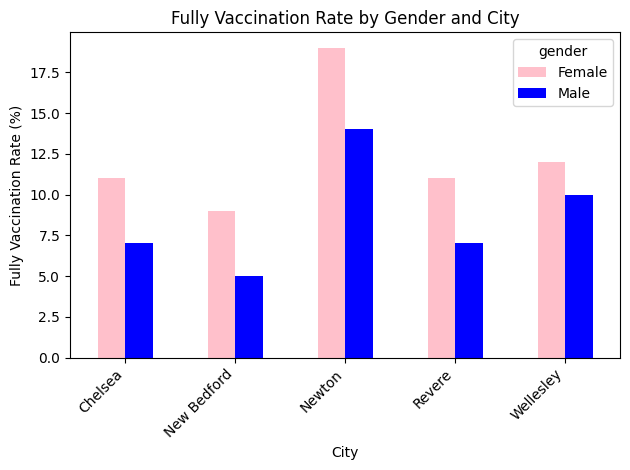

In [260]:
import matplotlib.pyplot as plt
filtered_df = vac_data[vac_data['gender'].isin(['Female', 'Male'])]
filtered_df = filtered_df[['month','city', 'gender', 'fully_vac_rate']]
filtered_df = filtered_df.drop_duplicates(subset=['city', 'gender'])
print(filtered_df.head())

# Pivoting the data for better visualization
pivot_df = filtered_df.pivot(index='city', columns='gender', values='fully_vac_rate')

# Plotting
plt.figure(figsize=(8, 6))
pivot_df.plot(kind='bar', color=['pink', 'blue'], title="Fully Vaccination Rate by Gender and City")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Fully Vaccination Rate (%)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

10


<Figure size 800x600 with 0 Axes>

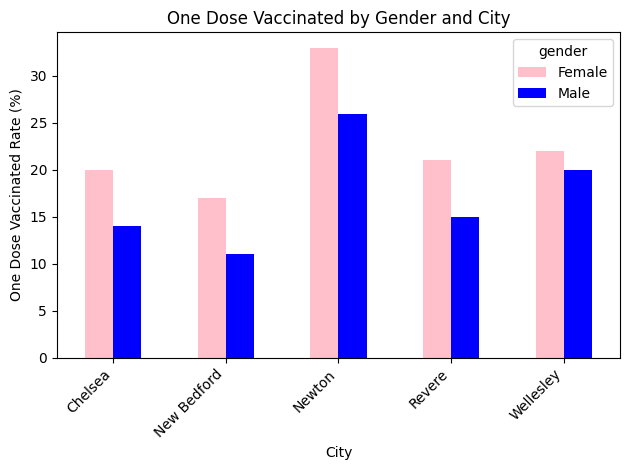

In [95]:
filtered_df = vac_data[vac_data['gender'].isin(['Female', 'Male'])]
filtered_df = filtered_df[['city', 'gender', 'onedose_vac_rate']]
filtered_df = filtered_df.drop_duplicates(subset=['city', 'gender'])

# Pivoting the data for better visualization
pivot_df = filtered_df.pivot(index='city', columns='gender', values='onedose_vac_rate')

# Plotting
plt.figure(figsize=(8, 6))
pivot_df.plot(kind='bar', color=['pink', 'blue'], title="One Dose Vaccinated by Gender and City")
plt.xticks(rotation=45, ha='right')
plt.ylabel('One Dose Vaccinated Rate (%)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

In [207]:
filtered_df

,city,gender,fully_vac_rate
200,New Bedford,Female,9.0
201,New Bedford,Male,5.0
780,Newton,Female,19.0
781,Newton,Male,14.0
968,Wellesley,Female,12.0
969,Wellesley,Male,10.0
1096,Chelsea,Female,11.0
1097,Chelsea,Male,7.0
1100,Revere,Female,11.0
1101,Revere,Male,7.0


In [196]:
# 2. transform data into monthly data

# Group by 'year', 'month', 'city', and 'race' and then take the max
monthly_data = vac_data.drop(columns=['date'])
monthly_data = monthly_data.groupby(['year', 'month', 'city', 'gender']).max().reset_index()

print(len(monthly_data))

monthly_data.head(10)

520


,year,month,city,gender,county,population,atleast_onedose,fully_vaccinated,boosted_after_2022-09-01,boosted,boosted_second,partially_vaccinated,fully_vac_rate,partially_vac_rate,onedose_vac_rate,boosted_rate,year_month
0,2021,3,Chelsea,Female,Suffolk,17783.0,5311.0,3304.0,NaN,NaN,NaN,2007.0,19.0,11.0,30.0,NaN,2021-03
1,2021,3,Chelsea,Male,Suffolk,19135.0,4120.0,2405.0,NaN,NaN,NaN,1715.0,13.0,9.0,22.0,NaN,2021-03
2,2021,3,Chelsea,Other,Suffolk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03
3,2021,3,Chelsea,Total,Suffolk,36918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03
4,2021,3,New Bedford,Female,Bristol,51975.0,12408.0,7463.0,NaN,NaN,NaN,4958.0,14.0,10.0,24.0,NaN,2021-03
5,2021,3,New Bedford,Male,Bristol,48005.0,8093.0,4503.0,NaN,NaN,NaN,3601.0,9.0,8.0,17.0,NaN,2021-03
6,2021,3,New Bedford,Other,Bristol,NaN,126.0,74.0,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,2021-03
7,2021,3,New Bedford,Total,Bristol,99980.0,20627.0,12040.0,NaN,NaN,NaN,8608.0,12.0,9.0,21.0,NaN,2021-03
8,2021,3,Newton,Female,Middlesex,48393.0,22261.0,14345.0,NaN,NaN,NaN,7916.0,30.0,16.0,46.0,NaN,2021-03
9,2021,3,Newton,Male,Middlesex,43297.0,16640.0,10295.0,NaN,NaN,NaN,6345.0,24.0,15.0,38.0,NaN,2021-03


In [236]:
# 3. calculate the vaccination rate
# Calculating vaccination rate
monthly_data['fully_vac_rate'] = round((monthly_data['fully_vaccinated'] / monthly_data['population']),2) * 100
monthly_data['partially_vac_rate'] = round((monthly_data['partially_vaccinated'] / monthly_data['population']),2) * 100
monthly_data['onedose_vac_rate'] = round((monthly_data['atleast_onedose'] / monthly_data['population']),2) * 100
monthly_data['boosted_rate'] = round((monthly_data['boosted'] / monthly_data['population']),2) * 100

monthly_data = monthly_data[~monthly_data['gender'].isin(['Other'])]

monthly_data = monthly_data[~monthly_data['gender'].isin(['Total'])]
# monthly_data = monthly_data[~monthly_data['gender'].isin(['Male'])]


In [237]:
# 4. Adjusts the vaccination rates in the DataFrame such that they do not decrease compared to the previous time point.

def adjust_vac_rates_for_all_columns(df, city_col, race_col, time_col, vac_rate_cols):
    """
    Adjusts the vaccination rates in the DataFrame such that they do not decrease compared to the previous time point.

    :return: Modified DataFrame with adjusted vaccination rates.
    """
    # Iterate over each city and race
    for city in df[city_col].unique():
        for race in df[df[city_col] == city][race_col].unique():
            # Filter the data for the current city and race
            city_race_data = df[(df[city_col] == city) & (df[race_col] == race)].copy()
            # Sort by time to ensure chronological order
            city_race_data.sort_values(time_col, inplace=True)
            
            # Iterate over each vaccination rate column to apply the cummax adjustment
            for vac_rate_col in vac_rate_cols:
                city_race_data[vac_rate_col] = city_race_data[vac_rate_col].cummax()
            
            # Update the original DataFrame
            df.update(city_race_data)
    
    # Return the modified DataFrame
    return df

# Usage
vac_columns = ["fully_vac_rate", "onedose_vac_rate", "boosted_rate", "partially_vac_rate"]
monthly_data = adjust_vac_rates_for_all_columns(monthly_data, 'city', 'gender', 'year_month', vac_columns)


In [239]:
# Fillout the missing values with previous next value
def fill_missing_with_next(df, city_col, gender_col, time_col, vac_rate_cols):
    """
    Fills missing values in the vaccination rate columns with the next available non-NaN value.

    :param df: pandas DataFrame containing the data.
    :param vac_rate_cols: List of column names representing different vaccination rates.
    :return: DataFrame with missing values filled.
    """
    # Make a copy of the dataframe to avoid changing the original dataframe
    # Iterate over each city and race
    for city in df[city_col].unique():
        for race in df[df[city_col] == city][gender_col].unique():
            # Filter the data for the current city and race
            city_gender_data = df[(df[city_col] == city) & (df[gender_col] == race)].copy()
            # Sort by time to ensure chronological order
            city_gender_data.sort_values(time_col, inplace=True)
    
    # Iterate over each vaccination rate column and fill NaN values with the next non-NaN value
            for vac_rate_col in vac_rate_cols:
                city_gender_data[vac_rate_col] = city_gender_data[vac_rate_col].fillna(method='bfill')

            df.update(city_gender_data)
    # Update the original DataFrame
    return df

# Usage
vac_columns = ["fully_vac_rate", "onedose_vac_rate", "boosted_rate", "partially_vac_rate"]
monthly_data_filled = fill_missing_with_next(monthly_data, 'city', 'gender', 'year_month', vac_columns)


/var/folders/b1/s_2bdh751d7_gtrtwf3td9wc0000gn/T/ipykernel_72596/1836259686.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_gender_data[vac_rate_col] = city_gender_data[vac_rate_col].fillna(method='bfill')


In [262]:
monthly_data_filled

,year,month,city,gender,county,population,atleast_onedose,fully_vaccinated,boosted_after_2022-09-01,boosted,boosted_second,partially_vaccinated,fully_vac_rate,partially_vac_rate,onedose_vac_rate,boosted_rate,year_month
0,2021,3,Chelsea,Female,Suffolk,17783.0,5311.0,3304.0,NaN,NaN,NaN,2007.0,19.0,11.0,30.0,24.0,2021-03
1,2021,3,Chelsea,Male,Suffolk,19135.0,4120.0,2405.0,NaN,NaN,NaN,1715.0,13.0,9.0,22.0,19.0,2021-03
4,2021,3,New Bedford,Female,Bristol,51975.0,12408.0,7463.0,NaN,NaN,NaN,4958.0,14.0,10.0,24.0,17.0,2021-03
5,2021,3,New Bedford,Male,Bristol,48005.0,8093.0,4503.0,NaN,NaN,NaN,3601.0,9.0,8.0,17.0,14.0,2021-03
8,2021,3,Newton,Female,Middlesex,48393.0,22261.0,14345.0,NaN,NaN,NaN,7916.0,30.0,16.0,46.0,46.0,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2023,4,Newton,Male,Middlesex,41960.0,NaN,NaN,20556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04
512,2023,4,Revere,Female,Suffolk,31291.0,30157.0,26127.0,7118.0,NaN,NaN,NaN,83.0,NaN,96.0,NaN,2023-04
513,2023,4,Revere,Male,Suffolk,30895.0,27967.0,24170.0,5745.0,NaN,NaN,NaN,78.0,NaN,91.0,NaN,2023-04
516,2023,4,Wellesley,Female,Norfolk,16596.0,NaN,15315.0,7841.0,NaN,NaN,NaN,92.0,NaN,NaN,NaN,2023-04


In [267]:
# Calculate the average of vaccination rate by city and gender
average_vac_rate_by_city_gender = monthly_data_filled.groupby(['city', 'gender'])['fully_vac_rate'].mean()

average_vac_rate_by_city_gender

# # Plotting
# plt.figure(figsize=(8, 6))
# pivot_df.plot(kind='bar', color=['pink', 'blue'], title="Fully Vaccinated by Gender and City")
# plt.xticks(rotation=45, ha='right')
# plt.ylabel('Fully Vaccinated Rate (%)')
# plt.xlabel('City')
# plt.tight_layout()
# plt.show()

/var/folders/b1/s_2bdh751d7_gtrtwf3td9wc0000gn/T/ipykernel_72596/2745662442.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_vac_rate_by_city_gender = monthly_data_filled.groupby(['city', 'gender'])['fully_vac_rate'].mean()


city         gender
Chelsea      Male      68.576923
             Female    76.346154
New Bedford  Male      49.307692
             Female    54.000000
Newton       Male      81.560000
             Female    83.080000
Revere       Male      66.269231
             Female    70.923077
Wellesley    Male      74.692308
             Female    70.384615
Name: fully_vac_rate, dtype: float64

/var/folders/b1/s_2bdh751d7_gtrtwf3td9wc0000gn/T/ipykernel_72596/3464638713.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='fully_vac_rate', hue='gender', data=monthly_data_filled, estimator=np.median, ci=None)


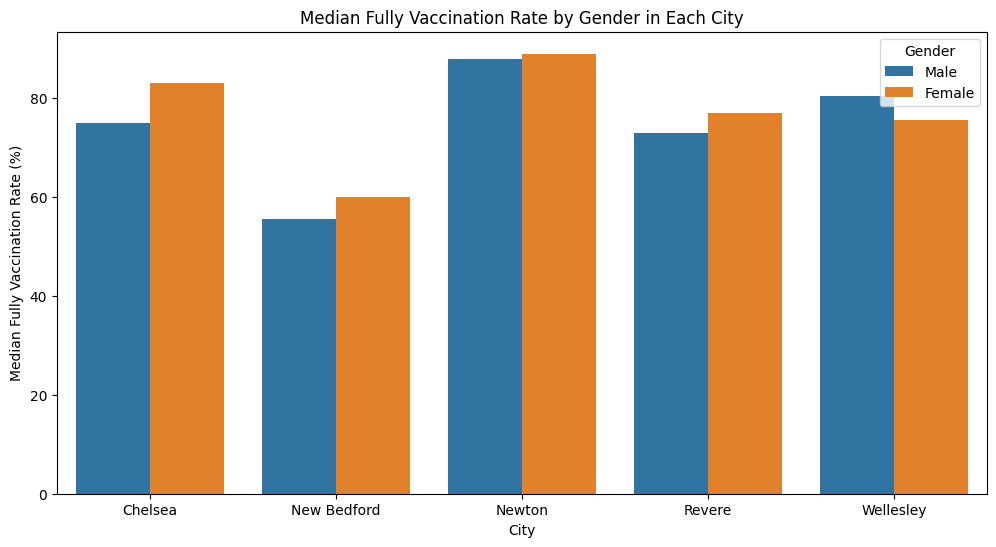

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a bar plot for the average vaccination rate by gender in each city
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='fully_vac_rate', hue='gender', data=monthly_data_filled, estimator=np.median, ci=None)

plt.title('Median Fully Vaccination Rate by Gender in Each City')
plt.xlabel('City')
plt.ylabel('Median Fully Vaccination Rate (%)')
plt.legend(title='Gender')
plt.show()


/var/folders/b1/s_2bdh751d7_gtrtwf3td9wc0000gn/T/ipykernel_72596/553494245.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= monthly_data_filled, x='year_month', y='fully_vac_rate', hue='gender', marker='o', ci=None, palette=palette)


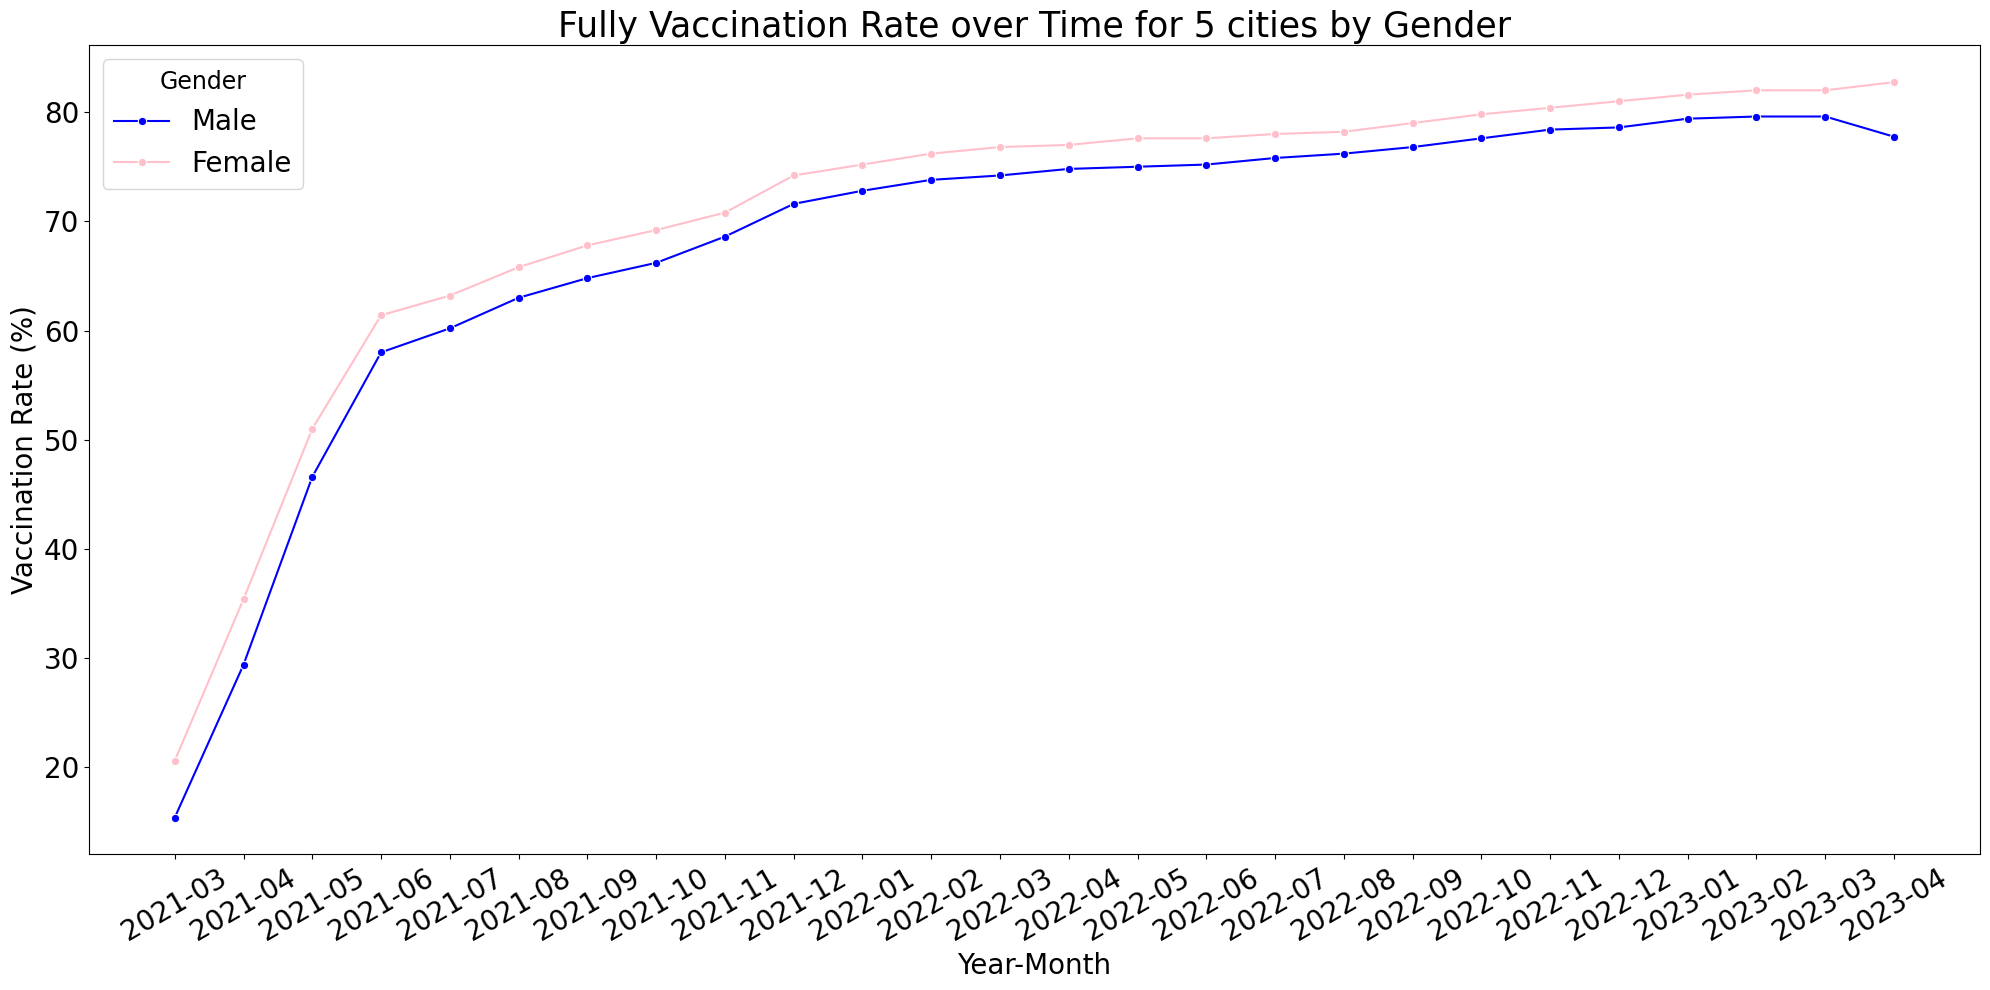

In [250]:
# Plotting fully_vac rate
plt.figure(figsize=(20, 10))
#sns.lineplot(data=df_filtered, x='date', y='vaccination_rate', hue='city', style='race')
monthly_data_filled['year_month'] = monthly_data_filled['year_month'].astype(str)

palette = {"Male": "blue", "Female": "pink"}
sns.lineplot(data= monthly_data_filled, x='year_month', y='fully_vac_rate', hue='gender', marker='o', ci=None, palette=palette)

# Adjusting x-axis for better readability

plt.xticks(rotation=30)

# Set title and labels
plt.title('Fully Vaccination Rate over Time for 5 cities by Gender', fontsize = 25)
plt.ylabel('Vaccination Rate (%)', fontsize = 20)
plt.xlabel('Year-Month', fontsize = 20)

# adjust the tick labels and legend
plt.xticks(rotation = 30, fontsize =20)
plt.yticks(fontsize = 20)
plt.legend(title='Gender', title_fontsize = '17', fontsize = 20, loc = 'upper left')


plt.tight_layout()
plt.show()

In [246]:
import statsmodels.formula.api as smf
# Constructing the linear regression model
monthly_data_filled['gender'] = pd.Categorical(monthly_data_filled['gender'], categories=['Male', 'Female'], ordered=True)

formula = 'fully_vac_rate ~ gender + city'
model = smf.ols(formula, data=monthly_data_filled).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         fully_vac_rate   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     21.63
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           5.27e-18
Time:                        12:46:30   Log-Likelihood:                -1071.7
No. Observations:                 258   AIC:                             2155.
Df Residuals:                     252   BIC:                             2177.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              71.0236    

In [248]:
female_population = monthly_data_filled[monthly_data_filled['gender'] == 'Female'][['year', 'month', 'city', 'population']]

# Step 2: Group by 'year', 'month', and 'city' to get the total female population
female_population_grouped = female_population.groupby(['year', 'month', 'city']).sum().reset_index()

# Step 3: Merge this grouped data back into the original DataFrame
new_df = monthly_data_filled.merge(female_population_grouped, on=['year', 'month', 'city'], how='left', suffixes=('', '_female'))


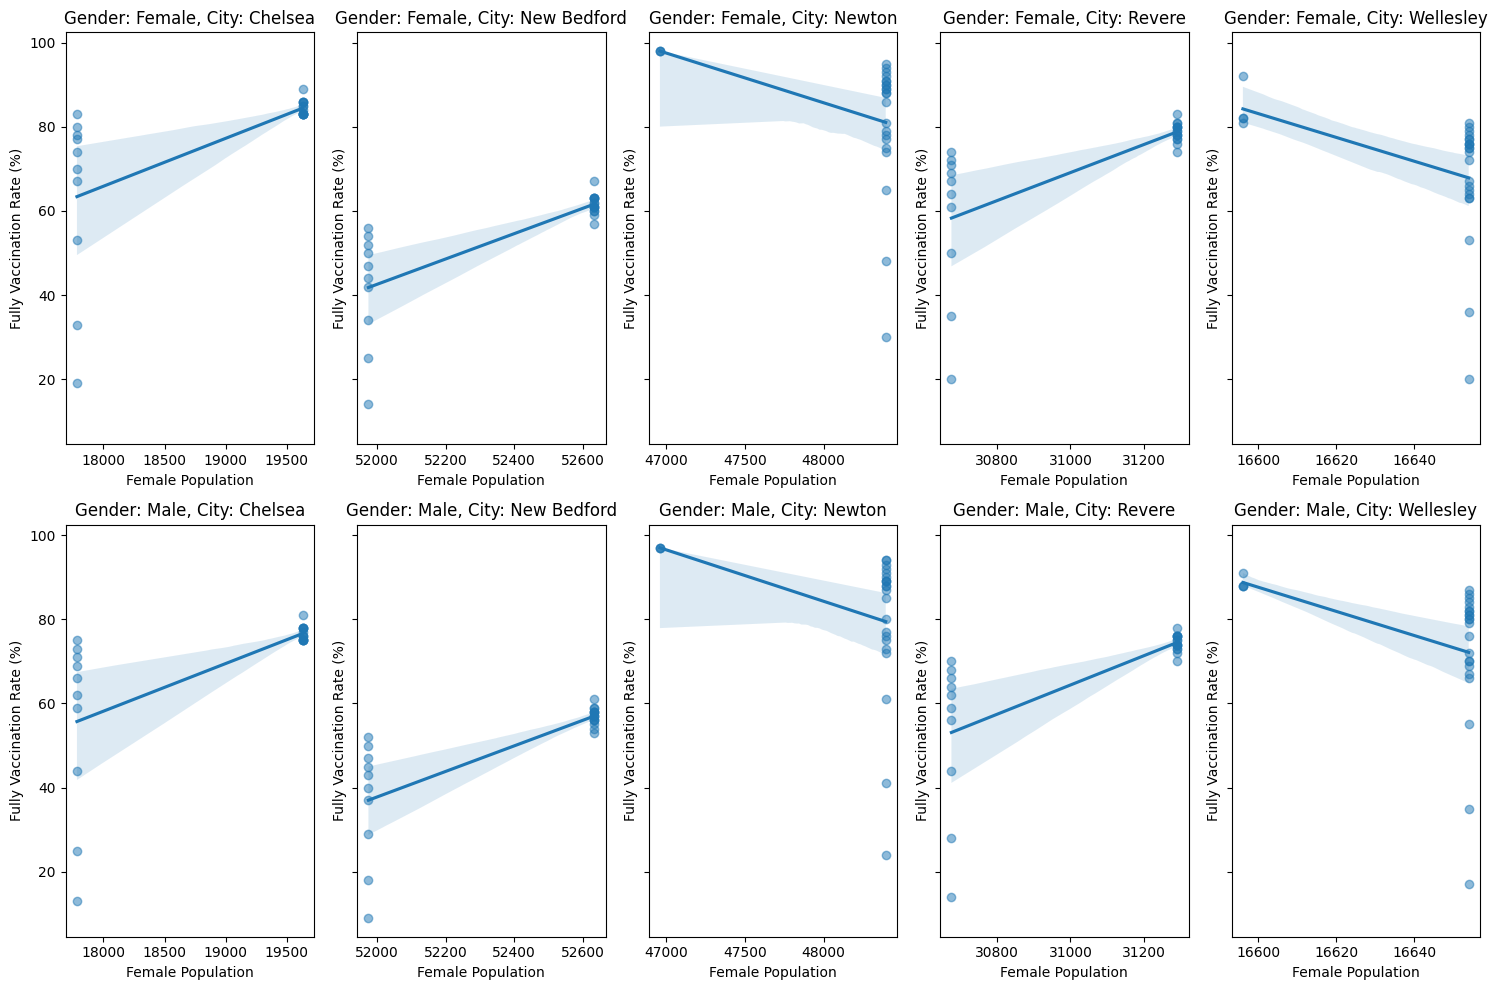

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'population_female' is a numeric predictor in your model
# and 'monthly_data_filled' is your DataFrame

# Unique categories of 'gender' and 'city'
genders = new_df['gender'].unique()
cities = new_df['city'].unique()

# Plotting
fig, axes = plt.subplots(len(genders), len(cities), figsize=(15, 10), sharey=True)

for i, gender in enumerate(genders):
    for j, city in enumerate(cities):
        ax = axes[i, j]
        subset = new_df[(new_df['gender'] == gender) & (new_df['city'] == city)]
        
        sns.regplot(
            x='population_female', 
            y='fully_vac_rate', 
            data=subset, 
            ax=ax,
            scatter_kws={'alpha': 0.5}
        )
        
        ax.set_title(f'Gender: {gender}, City: {city}')
        ax.set_xlabel('Female Population')
        ax.set_ylabel('Fully Vaccination Rate (%)')

plt.tight_layout()
plt.show()


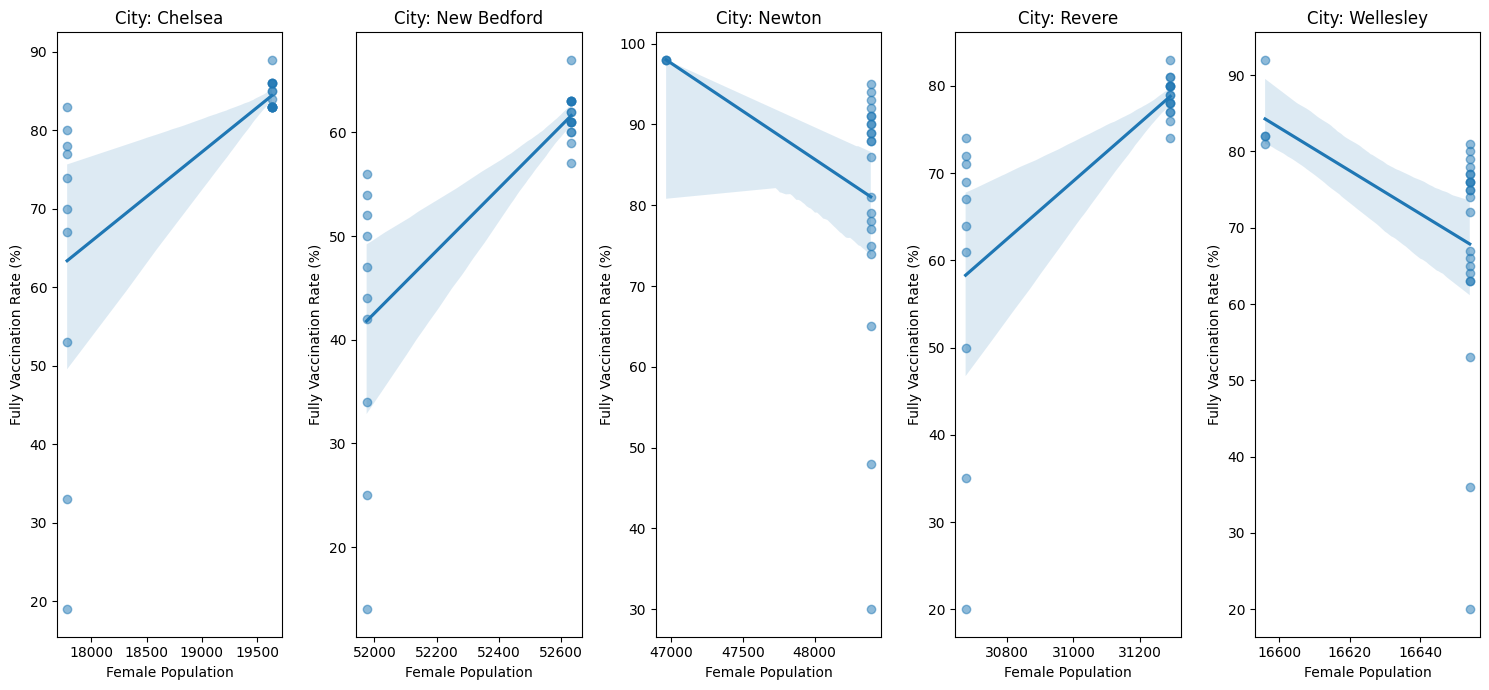

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for females
female_data = new_df[new_df['gender'] == 'Female']

# Get unique cities
cities = female_data['city'].unique()

# Plotting
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed

for i, city in enumerate(cities):
    plt.subplot(1, len(cities), i + 1)  # Create a subplot for each city
    sns.regplot(
        x='population_female',  # Replace with your predictor variable name
        y='fully_vac_rate', 
        data=female_data[female_data['city'] == city],
        scatter_kws={'alpha': 0.5}
    )
    plt.title(f'City: {city}')
    plt.xlabel('Female Population')  # Replace with your predictor variable name
    plt.ylabel('Fully Vaccination Rate (%)')

plt.tight_layout()
plt.show()


In [215]:
new_data = monthly_data.drop_duplicates(subset=['city', 'population', 'gender'])

# chelsea_data = monthly_data[monthly_data['city'] == 'Chelsea']
# print(chelsea_data)

newton_data = newton_data[newton_data['city'] == 'Newton']
newton_data


,year,month,city,gender,county,population,atleast_onedose,fully_vaccinated,boosted_after_2022-09-01,boosted,boosted_second,partially_vaccinated,fully_vac_rate,partially_vac_rate,onedose_vac_rate,boosted_rate,year_month
8,2021,3,Newton,Female,Middlesex,48393.0,22261.0,14345.0,NaN,NaN,NaN,7916.0,30.0,16.0,46.0,NaN,2021-03
9,2021,3,Newton,Male,Middlesex,43297.0,16640.0,10295.0,NaN,NaN,NaN,6345.0,24.0,15.0,38.0,NaN,2021-03
28,2021,4,Newton,Female,Middlesex,48393.0,32920.0,23123.0,NaN,NaN,NaN,10028.0,48.0,21.0,68.0,NaN,2021-04
29,2021,4,Newton,Male,Middlesex,43297.0,27395.0,17881.0,NaN,NaN,NaN,9550.0,41.0,22.0,63.0,NaN,2021-04
48,2021,5,Newton,Female,Middlesex,48393.0,37502.0,31368.0,NaN,NaN,NaN,9027.0,65.0,19.0,77.0,NaN,2021-05
49,2021,5,Newton,Male,Middlesex,43297.0,32233.0,26339.0,NaN,NaN,NaN,8998.0,61.0,21.0,74.0,NaN,2021-05
68,2021,6,Newton,Female,Middlesex,48393.0,39121.0,35805.0,NaN,NaN,NaN,5751.0,74.0,12.0,81.0,NaN,2021-06
69,2021,6,Newton,Male,Middlesex,43297.0,33996.0,31081.0,NaN,NaN,NaN,5388.0,72.0,12.0,79.0,NaN,2021-06
88,2021,7,Newton,Female,Middlesex,48393.0,39657.0,36369.0,NaN,NaN,NaN,3296.0,75.0,7.0,82.0,NaN,2021-07
89,2021,7,Newton,Male,Middlesex,43297.0,34467.0,31627.0,NaN,NaN,NaN,2872.0,73.0,7.0,80.0,NaN,2021-07


In [227]:
import pandas as pd

# Assuming df is your DataFrame
# Step 1: Filter for female population
female_population = new_data[new_data['gender'] == 'Female'][['year', 'month', 'city', 'population']]

# Step 2: Group by 'year', 'month', and 'city' to get the total female population
female_population_grouped = female_population.groupby(['year', 'month', 'city']).sum().reset_index()

# Step 3: Merge this grouped data back into the original DataFrame
new_df = newton_data.merge(female_population_grouped, on=['year', 'month', 'city'], how='left', suffixes=('', '_female'))

# Now df has an additional column 'population_female' with the female population for each city and month

KeyError: 'city'

In [228]:
new_df.shape

(52, 18)

In [225]:
new_df

,year,month,city,gender,county,population,atleast_onedose,fully_vaccinated,boosted_after_2022-09-01,boosted,boosted_second,partially_vaccinated,fully_vac_rate,partially_vac_rate,onedose_vac_rate,boosted_rate,year_month,population_female
0,2021,3,Newton,Female,Middlesex,48393.0,22261.0,14345.0,NaN,NaN,NaN,7916.0,30.0,16.0,46.0,NaN,2021-03,48393.0
1,2021,3,Newton,Male,Middlesex,43297.0,16640.0,10295.0,NaN,NaN,NaN,6345.0,24.0,15.0,38.0,NaN,2021-03,48393.0
2,2021,4,Newton,Female,Middlesex,48393.0,32920.0,23123.0,NaN,NaN,NaN,10028.0,48.0,21.0,68.0,NaN,2021-04,NaN
3,2021,4,Newton,Male,Middlesex,43297.0,27395.0,17881.0,NaN,NaN,NaN,9550.0,41.0,22.0,63.0,NaN,2021-04,NaN
4,2021,5,Newton,Female,Middlesex,48393.0,37502.0,31368.0,NaN,NaN,NaN,9027.0,65.0,19.0,77.0,NaN,2021-05,NaN
5,2021,5,Newton,Male,Middlesex,43297.0,32233.0,26339.0,NaN,NaN,NaN,8998.0,61.0,21.0,74.0,NaN,2021-05,NaN
6,2021,6,Newton,Female,Middlesex,48393.0,39121.0,35805.0,NaN,NaN,NaN,5751.0,74.0,12.0,81.0,NaN,2021-06,NaN
7,2021,6,Newton,Male,Middlesex,43297.0,33996.0,31081.0,NaN,NaN,NaN,5388.0,72.0,12.0,79.0,NaN,2021-06,NaN
8,2021,7,Newton,Female,Middlesex,48393.0,39657.0,36369.0,NaN,NaN,NaN,3296.0,75.0,7.0,82.0,NaN,2021-07,NaN
9,2021,7,Newton,Male,Middlesex,43297.0,34467.0,31627.0,NaN,NaN,NaN,2872.0,73.0,7.0,80.0,NaN,2021-07,NaN


In [226]:
import statsmodels.api as sm

# Assuming df is your DataFrame and it already contains a 'population_female' column
# Prepare the data
X = new_df['population_female']  # Predictor
y = new_df['fully_vac_rate']     # Response

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

plt.scatter(new_df['population_female'], new_df['fully_vac_rate'], alpha=0.7, label='Data points')


# Regression line
predicted_values = model.predict(X)
plt.plot(new_df['population_female'], predicted_values, color='red', label='Regression Line')

# Plot details
plt.xlabel('Female Population')
plt.ylabel('Fully Vaccination Rate (%)')
plt.title('Linear Regression: Vaccination Rate vs Female Population')
plt.legend()
plt.show()

# Check the results
summary = model.summary()

print(summary)

MissingDataError: exog contains inf or nans

In [175]:
import pandas as pd

# Assuming df is your DataFrame
# Step 1: Filter for female population
female_population = monthly_data[monthly_data['gender'] == 'Female'][['year', 'month', 'city', 'population']]

# Step 2: Group by 'year', 'month', and 'city' to get the total female population
female_population_grouped = female_population.groupby(['year', 'month', 'city']).sum().reset_index()

# Step 3: Merge this grouped data back into the original DataFrame
df = monthly_data.merge(female_population_grouped, on=['year', 'month', 'city'], how='left', suffixes=('', '_female'))

# Now df has an additional column 'population_female' with the female population for each city and month


In [176]:
df

,year,month,city,gender,county,population,atleast_onedose,fully_vaccinated,boosted_after_2022-09-01,boosted,boosted_second,partially_vaccinated,fully_vac_rate,partially_vac_rate,onedose_vac_rate,boosted_rate,year_month,population_female
0,2021,3,Chelsea,Female,Suffolk,17783.0,5311.0,3304.0,NaN,NaN,NaN,2007.0,19.0,11.0,30.0,NaN,2021-03,17783.0
1,2021,3,Chelsea,Male,Suffolk,19135.0,4120.0,2405.0,NaN,NaN,NaN,1715.0,13.0,9.0,22.0,NaN,2021-03,17783.0
2,2021,3,New Bedford,Female,Bristol,51975.0,12408.0,7463.0,NaN,NaN,NaN,4958.0,14.0,10.0,24.0,NaN,2021-03,51975.0
3,2021,3,New Bedford,Male,Bristol,48005.0,8093.0,4503.0,NaN,NaN,NaN,3601.0,9.0,8.0,17.0,NaN,2021-03,51975.0
4,2021,3,Newton,Female,Middlesex,48393.0,22261.0,14345.0,NaN,NaN,NaN,7916.0,30.0,16.0,46.0,NaN,2021-03,48393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2023,4,Newton,Male,Middlesex,41960.0,NaN,NaN,20556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04,46963.0
256,2023,4,Revere,Female,Suffolk,31291.0,30157.0,26127.0,7118.0,NaN,NaN,NaN,83.0,NaN,96.0,NaN,2023-04,31291.0
257,2023,4,Revere,Male,Suffolk,30895.0,27967.0,24170.0,5745.0,NaN,NaN,NaN,78.0,NaN,91.0,NaN,2023-04,31291.0
258,2023,4,Wellesley,Female,Norfolk,16596.0,NaN,15315.0,7841.0,NaN,NaN,NaN,92.0,NaN,NaN,NaN,2023-04,16596.0


In [ ]:
import statsmodels.api as sm

# Constructing the linear regression model
formula = 'fully_vac_rate ~ race + city + boosted_rate'
model = smf.ols(formula, data=monthly_data_filled).fit()
# Encoding 'race' as a numerical value
#monthly_data['race_encoded'] = monthly_data['race'].astype('category').cat.codes

# Create a combined cluster variable
#monthly_data_filled['combined_cluster'] =  + "_" + 
print(model.summary())


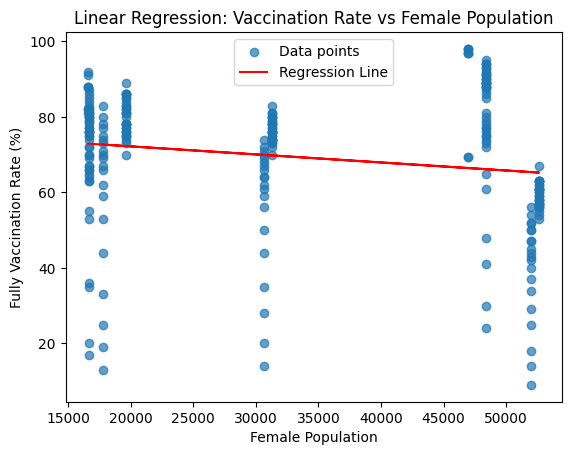

                            OLS Regression Results                            
Dep. Variable:         fully_vac_rate   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     7.729
Date:                Sun, 26 Nov 2023   Prob (F-statistic):            0.00583
Time:                        21:07:15   Log-Likelihood:                -1121.0
No. Observations:                 260   AIC:                             2246.
Df Residuals:                     258   BIC:                             2253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.4425      2.79

In [141]:
import statsmodels.api as sm

# Assuming df is your DataFrame and it already contains a 'population_female' column
# Prepare the data
X = df['population_female']  # Predictor
y = df['fully_vac_rate']     # Response

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

plt.scatter(df['population_female'], df['fully_vac_rate'], alpha=0.7, label='Data points')


# Regression line
predicted_values = model.predict(X)
plt.plot(df['population_female'], predicted_values, color='red', label='Regression Line')

# Plot details
plt.xlabel('Female Population')
plt.ylabel('Fully Vaccination Rate (%)')
plt.title('Linear Regression: Vaccination Rate vs Female Population')
plt.legend()
plt.show()

# Check the results
summary = model.summary()

print(summary)

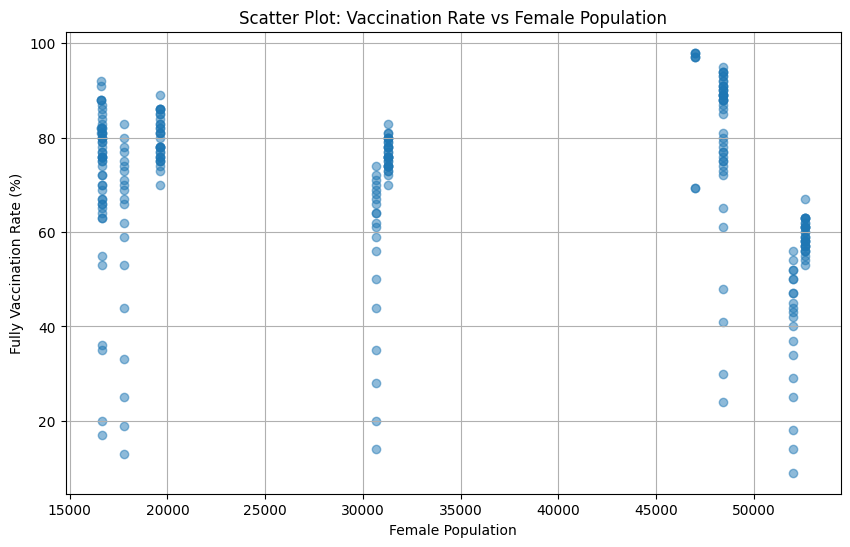

In [142]:
# Plotting the relationship without a regression model
plt.figure(figsize=(10, 6))
plt.scatter(df['population_female'], df['fully_vac_rate'], alpha=0.5)

# Plot details
plt.xlabel('Female Population')
plt.ylabel('Fully Vaccination Rate (%)')
plt.title('Scatter Plot: Vaccination Rate vs Female Population')
plt.grid(True)
plt.show()

Missing values: year                          0
month                         0
city                          0
gender                        0
county                        0
population                    0
atleast_onedose              41
fully_vaccinated              2
boosted_after_2022-09-01    250
boosted                     100
boosted_second              170
partially_vaccinated         90
fully_vac_rate                2
partially_vac_rate           90
onedose_vac_rate             41
boosted_rate                100
year_month                    0
dtype: int64


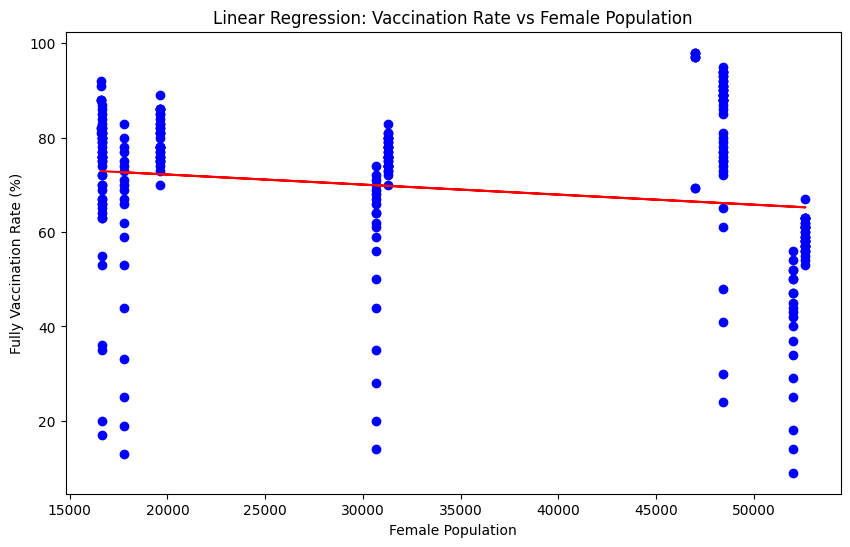

(-0.0002128600497607239, 76.44245891599874)

In [137]:

# Imputing missing values with the mean
df['fully_vac_rate'].fillna(df['fully_vac_rate'].mean(), inplace=True)

# Check for missing values
print("Missing values:", monthly_data.isnull().sum())

# Reshaping the predictor variable for use in LinearRegression
X = df[['population_female']]  # Needs to be in 2D array format
y = df['fully_vac_rate']

# Setting up linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting the slope (coefficient) and the intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['population_female'], y, color='blue')
plt.plot(df['population_female'], model.predict(X), color='red')
plt.xlabel('Female Population')
plt.ylabel('Fully Vaccination Rate (%)')
plt.title('Linear Regression: Vaccination Rate vs Female Population')
plt.show()

(slope, intercept)

In [165]:
import pandas as pd

# Assuming df is your DataFrame
# Step 1: Filter for female population
female_population = population_df[population_df['gender'] == 'Female'][['year', 'month', 'city', 'population']]

# Step 2: Group by 'year', 'month', and 'city' to get the total female population
female_population_grouped = female_population.groupby(['year', 'month', 'city']).sum().reset_index()

# Step 3: Merge this grouped data back into the original DataFrame
merged_df = population_df.merge(female_population_grouped, on=['year', 'month', 'city'], how='left', suffixes=('', '_female'))

In [171]:
# 3. calculate the vaccination rate
# Calculating vaccination rate
merged_df['fully_vac_rate'] = round((merged_df['fully_vaccinated'] / merged_df['population']),2) * 100
merged_df['partially_vac_rate'] = round((merged_df['partially_vaccinated'] / merged_df['population']),2) * 100
merged_df['onedose_vac_rate'] = round((merged_df['atleast_onedose'] / merged_df['population']),2) * 100
merged_df['boosted_rate'] = round((merged_df['boosted'] / merged_df['population']),2) * 100


# exclued data of 'Other/Unknown' in race
merged_df = merged_df[~merged_df['gender'].isin(['Other'])]

# exclued data of 'NH/PI' in race
merged_df = merged_df[~merged_df['gender'].isin(['Total'])]

In [172]:
merged_df

,date,county,city,gender,population,atleast_onedose,fully_vaccinated,boosted_after_2022-09-01,boosted,boosted_second,partially_vaccinated,fully_vac_rate,partially_vac_rate,onedose_vac_rate,boosted_rate,year,month,year_month,population_female
0,2021-03-09,Bristol,New Bedford,Female,51975.0,8901.0,4421.0,NaN,NaN,NaN,4480.0,9.0,9.0,17.0,NaN,2021,3,2021-03,51975.0
1,2021-03-09,Bristol,New Bedford,Male,48005.0,5468.0,2242.0,NaN,NaN,NaN,3226.0,5.0,7.0,11.0,NaN,2021,3,2021-03,51975.0
2,2021-03-09,Middlesex,Newton,Female,48393.0,15783.0,9268.0,NaN,NaN,NaN,6515.0,19.0,13.0,33.0,NaN,2021,3,2021-03,48393.0
3,2021-03-09,Middlesex,Newton,Male,43297.0,11400.0,6245.0,NaN,NaN,NaN,5155.0,14.0,12.0,26.0,NaN,2021,3,2021-03,48393.0
4,2021-03-09,Norfolk,Wellesley,Female,16654.0,3642.0,2010.0,NaN,NaN,NaN,1632.0,12.0,10.0,22.0,NaN,2021,3,2021-03,16654.0
5,2021-03-09,Norfolk,Wellesley,Male,13059.0,2631.0,1293.0,NaN,NaN,NaN,1338.0,10.0,10.0,20.0,NaN,2021,3,2021-03,16654.0
6,2021-03-09,Suffolk,Chelsea,Female,17783.0,3526.0,2035.0,NaN,NaN,NaN,1491.0,11.0,8.0,20.0,NaN,2021,3,2021-03,17783.0
7,2021-03-09,Suffolk,Chelsea,Male,19135.0,2651.0,1346.0,NaN,NaN,NaN,1305.0,7.0,7.0,14.0,NaN,2021,3,2021-03,17783.0
8,2021-03-09,Suffolk,Revere,Female,30676.0,6295.0,3509.0,NaN,NaN,NaN,2786.0,11.0,9.0,21.0,NaN,2021,3,2021-03,30676.0
9,2021-03-09,Suffolk,Revere,Male,30173.0,4493.0,2175.0,NaN,NaN,NaN,2318.0,7.0,8.0,15.0,NaN,2021,3,2021-03,30676.0


In [173]:
len(merged_df)

20

Missing values: date                         0
county                       0
city                         0
gender                       0
population                   0
atleast_onedose              3
fully_vaccinated             0
boosted_after_2022-09-01    20
boosted                     10
boosted_second              16
partially_vaccinated         4
fully_vac_rate               0
partially_vac_rate           4
onedose_vac_rate             3
boosted_rate                10
year                         0
month                        0
year_month                   0
population_female            0
dtype: int64


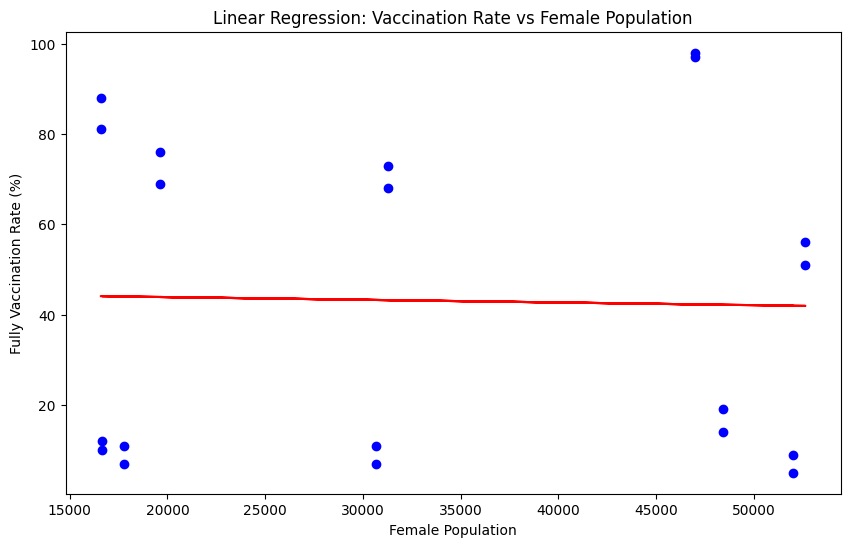

(-5.9497561810891445e-05, 45.078859157049344)

In [174]:

# Imputing missing values with the mean
merged_df['fully_vac_rate'].fillna(merged_df['fully_vac_rate'].mean(), inplace=True)

# Check for missing values
print("Missing values:", merged_df.isnull().sum())

# Reshaping the predictor variable for use in LinearRegression
X = merged_df[['population_female']]  # Needs to be in 2D array format
y = merged_df['fully_vac_rate']

# Setting up linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting the slope (coefficient) and the intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['population_female'], y, color='blue')
plt.plot(merged_df['population_female'], model.predict(X), color='red')
plt.xlabel('Female Population')
plt.ylabel('Fully Vaccination Rate (%)')
plt.title('Linear Regression: Vaccination Rate vs Female Population')
plt.show()

(slope, intercept)

In [164]:
population_df = vac_data[vac_data['gender'].isin(['Female', 'Male',])]
print(population_df.shape)
population_df = population_df.drop_duplicates(subset=['city', 'population'])
print(len(population_df))
population_df

(1110, 18)
20


,date,county,city,gender,population,atleast_onedose,fully_vaccinated,boosted_after_2022-09-01,boosted,boosted_second,partially_vaccinated,fully_vac_rate,partially_vac_rate,onedose_vac_rate,boosted_rate,year,month,year_month
200,2021-03-09,Bristol,New Bedford,Female,51975.0,8901.0,4421.0,NaN,NaN,NaN,4480.0,9.0,9.0,17.0,NaN,2021,3,2021-03
201,2021-03-09,Bristol,New Bedford,Male,48005.0,5468.0,2242.0,NaN,NaN,NaN,3226.0,5.0,7.0,11.0,NaN,2021,3,2021-03
780,2021-03-09,Middlesex,Newton,Female,48393.0,15783.0,9268.0,NaN,NaN,NaN,6515.0,19.0,13.0,33.0,NaN,2021,3,2021-03
781,2021-03-09,Middlesex,Newton,Male,43297.0,11400.0,6245.0,NaN,NaN,NaN,5155.0,14.0,12.0,26.0,NaN,2021,3,2021-03
968,2021-03-09,Norfolk,Wellesley,Female,16654.0,3642.0,2010.0,NaN,NaN,NaN,1632.0,12.0,10.0,22.0,NaN,2021,3,2021-03
969,2021-03-09,Norfolk,Wellesley,Male,13059.0,2631.0,1293.0,NaN,NaN,NaN,1338.0,10.0,10.0,20.0,NaN,2021,3,2021-03
1096,2021-03-09,Suffolk,Chelsea,Female,17783.0,3526.0,2035.0,NaN,NaN,NaN,1491.0,11.0,8.0,20.0,NaN,2021,3,2021-03
1097,2021-03-09,Suffolk,Chelsea,Male,19135.0,2651.0,1346.0,NaN,NaN,NaN,1305.0,7.0,7.0,14.0,NaN,2021,3,2021-03
1100,2021-03-09,Suffolk,Revere,Female,30676.0,6295.0,3509.0,NaN,NaN,NaN,2786.0,11.0,9.0,21.0,NaN,2021,3,2021-03
1101,2021-03-09,Suffolk,Revere,Male,30173.0,4493.0,2175.0,NaN,NaN,NaN,2318.0,7.0,8.0,15.0,NaN,2021,3,2021-03


In [169]:

# Imputing missing values with the mean
population_df['fully_vac_rate'].fillna(population_df['fully_vac_rate'].mean(), inplace=True)

# Check for missing values
print("Missing values:", population_df.isnull().sum())

# Reshaping the predictor variable for use in LinearRegression
X = population_df[['female_population']]  # Needs to be in 2D array format
y = population_df['fully_vac_rate']

# Setting up linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting the slope (coefficient) and the intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(population_df['female_population'], y, color='blue')
plt.plot(population_df['female_population'], model.predict(X), color='red')
plt.xlabel('Female Population')
plt.ylabel('Fully Vaccination Rate (%)')
plt.title('Linear Regression: Vaccination Rate vs Female Population')
plt.show()

(slope, intercept)

Missing values: date                         0
county                       0
city                         0
gender                       0
population                   0
atleast_onedose              3
fully_vaccinated             0
boosted_after_2022-09-01    20
boosted                     10
boosted_second              16
partially_vaccinated         4
fully_vac_rate               0
partially_vac_rate           4
onedose_vac_rate             0
boosted_rate                10
year                         0
month                        0
year_month                   0
dtype: int64


KeyError: "None of [Index(['female_population'], dtype='object')] are in the [columns]"

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


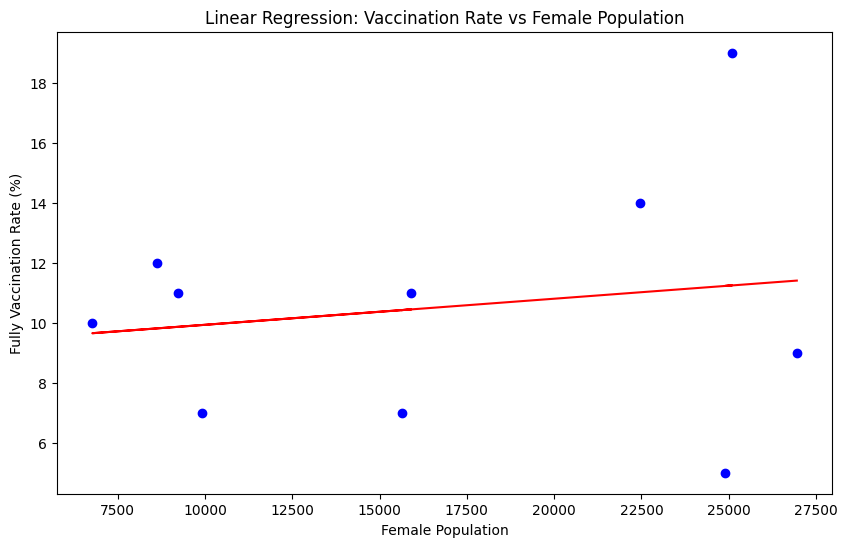

((8.694451563343497e-05, 9.061233460846353),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:         fully_vac_rate   R-squared:                       0.028
 Model:                            OLS   Adj. R-squared:                 -0.093
 Method:                 Least Squares   F-statistic:                    0.2337
 Date:                Sun, 26 Nov 2023   Prob (F-statistic):              0.642
 Time:                        15:49:17   Log-Likelihood:                -27.399
 No. Observations:                  10   AIC:                             58.80
 Df Residuals:                       8   BIC:                             59.40
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
 -----------------

In [91]:
import statsmodels.api as sm

# Reshaping the predictor variable for use in OLS
X = population_df[['female_population']]  # Needs to be in 2D array format
X = sm.add_constant(X)  # adding a constant
y = population_df['fully_vac_rate']

# Setting up OLS regression model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()

# Getting the slope (coefficient) and the intercept from the model
slope = model.params['female_population']
intercept = model.params['const']

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(population_df['female_population'], y, color='blue')
plt.plot(population_df['female_population'], model.predict(X), color='red')
plt.xlabel('Female Population')
plt.ylabel('Fully Vaccination Rate (%)')
plt.title('Linear Regression: Vaccination Rate vs Female Population')
plt.show()

(slope, intercept), model_summary

In [92]:
print(len(population_df['female_population']))

10


In [15]:
# List of cities of interest
cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']

# Filtering the DataFrame for the cities of interest and relevant genders
filtered_df = vac_data[(vac_data['city'].isin(cities_of_interest)) & df['gender'].isin(['Female', 'Male'])]

# Grouping by city and gender, then summing up the fully vaccinated numbers
comparison_df = filtered_df.groupby(['city', 'gender'])['fully_vaccinated'].sum().unstack()

comparison_df

/var/folders/b1/s_2bdh751d7_gtrtwf3td9wc0000gn/T/ipykernel_72596/1733557782.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = vac_data[(vac_data['city'].isin(cities_of_interest)) & df['gender'].isin(['Female', 'Male'])]


gender,Female,Male
city,,
Chelsea,1579954.0,1534457.0
New Bedford,3098428.0,2607583.0
Newton,4281813.0,3753654.0
Revere,2419010.0,2223987.0
Wellesley,1283556.0,1066692.0


In [32]:
# List of cities of interest
cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']

# Filtering the DataFrame for the cities of interest and relevant genders
filtered_df = vac_data[(vac_data['city'].isin(cities_of_interest)) & df['gender'].isin(['Female', 'Male'])]

# Grouping by city and gender, then summing up the fully vaccinated numbers
comparison_df = filtered_df.groupby(['city', 'gender'])['fully_vaccinated'].sum().unstack()

comparison_df

gender,Female,Male
city,,
Chelsea,1579954.0,1534457.0
New Bedford,3098428.0,2607583.0
Newton,4425744.0,3880319.0
Revere,2419010.0,2223987.0
Wellesley,1283556.0,1066692.0


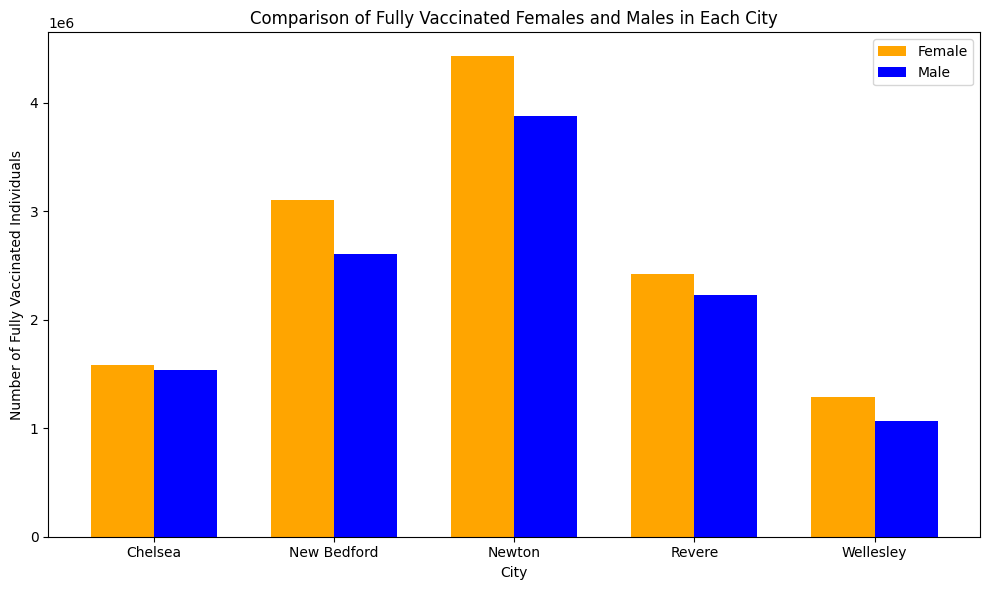

In [33]:
import numpy as np
plt.figure(figsize=(10, 6))

# Setting the positions for the bars
bar_width = 0.35
index = np.arange(len(comparison_df))

# Plotting the bars for females and males side by side for each city
bar1 = plt.bar(index, comparison_df['Female'], bar_width, label='Female', color='orange')
bar2 = plt.bar(index + bar_width, comparison_df['Male'], bar_width, label='Male', color='blue')

plt.xlabel('City')
plt.ylabel('Number of Fully Vaccinated Individuals')
plt.title('Comparison of Fully Vaccinated Females and Males in Each City')
plt.xticks(index + bar_width / 2, comparison_df.index)
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
# List of cities of interest
cities_of_interest = ['Revere', 'Chelsea', 'Newton', 'Wellesley', 'New Bedford']

# Filtering the DataFrame for the cities of interest and relevant genders
filtered_one_df = df[(df['city'].isin(cities_of_interest)) & df['gender'].isin(['Female', 'Male'])]

# Grouping by city and gender, then summing up the fully vaccinated numbers
comparison_one_df = filtered_df.groupby(['city', 'gender'])['atleast_onedose'].sum().unstack()

comparison_one_df

gender,Female,Male
city,,
Chelsea,1914063.0,1883738.0
New Bedford,3604223.0,3054006.0
Newton,5096012.0,4461039.0
Revere,2828375.0,2606032.0
Wellesley,1512182.0,1245017.0


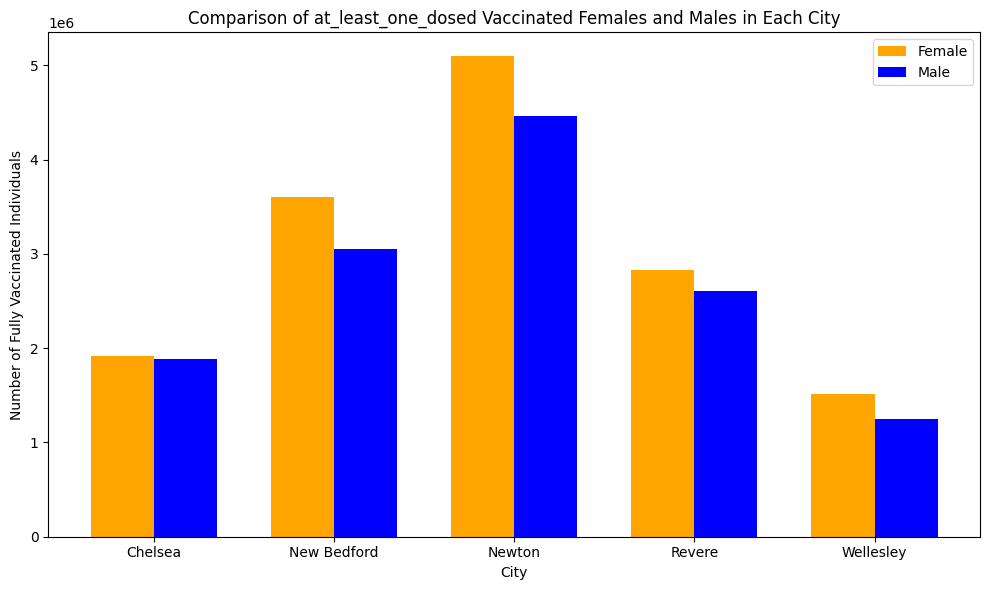

In [36]:
import numpy as np
plt.figure(figsize=(10, 6))

# Setting the positions for the bars
bar_width = 0.35
index = np.arange(len(comparison_one_df))

# Plotting the bars for females and males side by side for each city
bar1 = plt.bar(index, comparison_one_df['Female'], bar_width, label='Female', color='orange')
bar2 = plt.bar(index + bar_width, comparison_one_df['Male'], bar_width, label='Male', color='blue')

plt.xlabel('City')
plt.ylabel('Number of Fully Vaccinated Individuals')
plt.title('Comparison of at_least_one_dosed Vaccinated Females and Males in Each City')
plt.xticks(index + bar_width / 2, comparison_one_df.index)
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# Create a DataFrame from the sample data
# df = pd.DataFrame(data)

# Group the data by 'City' and 'Gender' and calculate the sum of 'Fully_Vaccinated' for each group
result = df_cleaned.groupby(['city', 'gender'])['fully_vaccinated'].sum().unstack(fill_value=0)

# Print the result
print(result)

gender          Female       Male    Other      Total
city                                                 
Abington      678416.0   582480.0      0.0        0.0
Acton        1082475.0  1006237.0   2727.0  1292522.0
Acushnet      369096.0   322615.0      0.0        0.0
Adams         319248.0   274497.0      0.0        0.0
Agawam       1054273.0   868613.0   8334.0   471267.0
...                ...        ...      ...        ...
Woburn       1733750.0  1501737.0   4920.0  2071882.0
Worcester    6804754.0  5978610.0  25158.0  8369615.0
Worthington    45752.0    40211.0      0.0        0.0
Wrentham      512394.0   460000.0    931.0   201789.0
Yarmouth     1085288.0   852369.0      0.0        0.0

[339 rows x 4 columns]


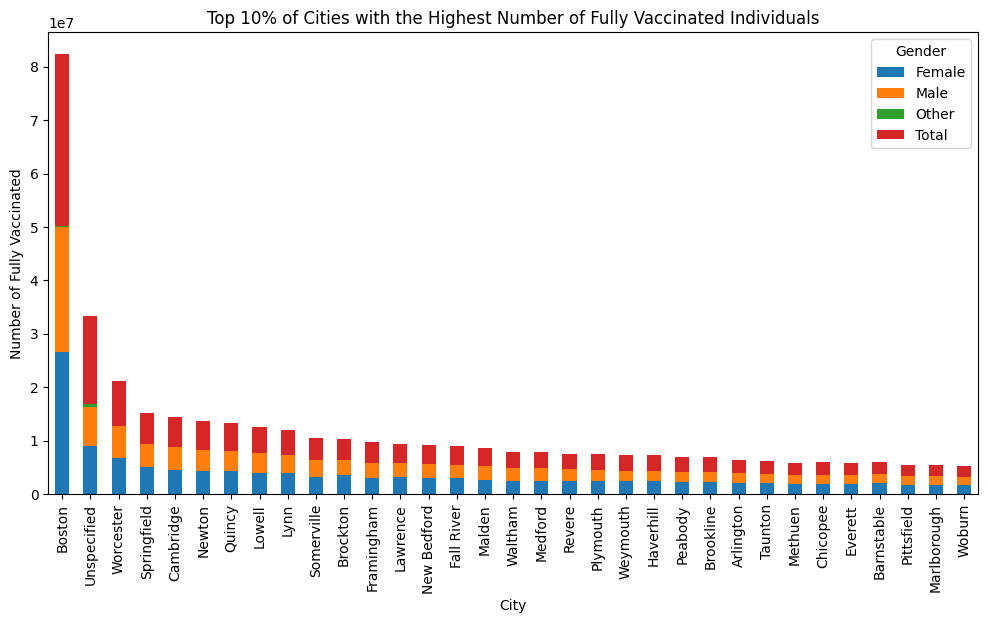

In [26]:
df_sorted = result.sort_values(by='Total', ascending=False)


# Calculate the number of cities in the top 10%
num_cities_top_10_percent = int(len(df_sorted) * 0.1)

# Select the top 10% of cities
top_10_percent_cities = df_sorted.head(num_cities_top_10_percent)

# Plot the histogram for the top 10% of cities
top_10_percent_cities.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Number of Fully Vaccinated')
plt.title('Top 10% of Cities with the Highest Number of Fully Vaccinated Individuals')
plt.legend(title='Gender')

plt.show()


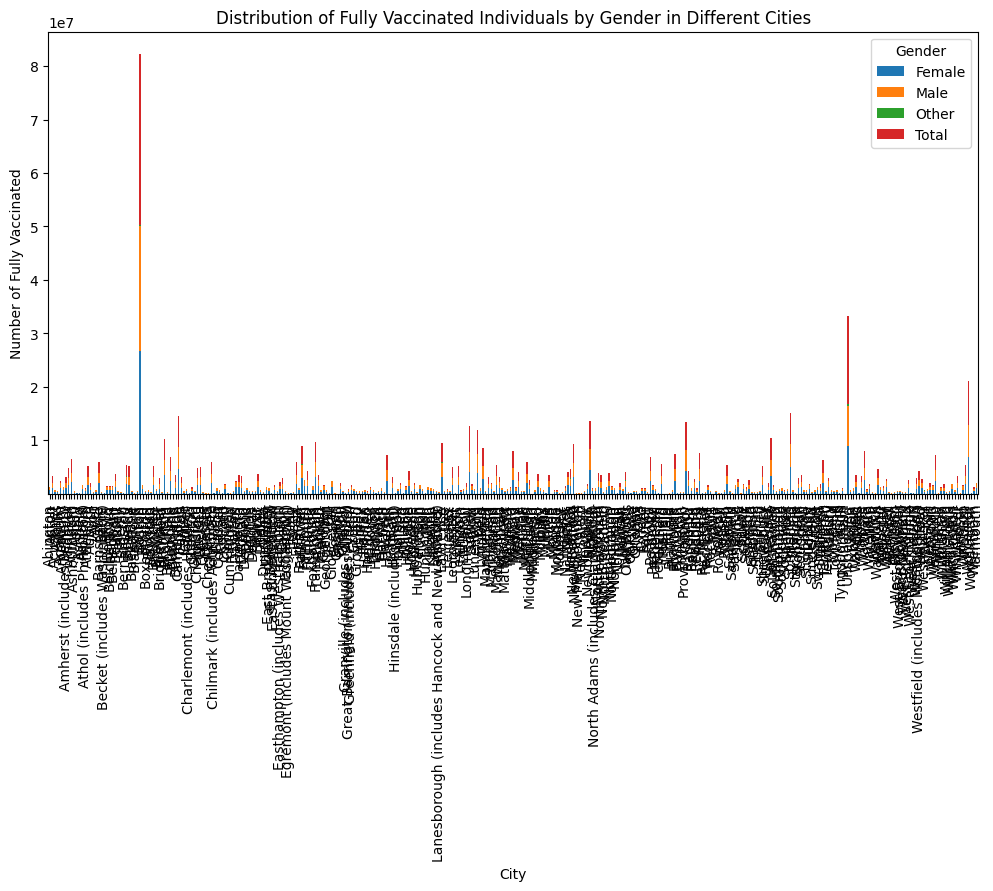

In [15]:
import matplotlib.pyplot as plt

# Plot the histogram
result.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Number of Fully Vaccinated')
plt.title('Distribution of Fully Vaccinated Individuals by Gender in Different Cities')
plt.legend(title='Gender')

plt.show()